# Smart Grid Stability Prediction using Logistic Regression From Scratch 

## 1. Foreword

This notebook is based on the "__Electrical Grid Stability Simulated Dataset__" created by Vadim Arzamasov and donted to __University of California (UCI) Machine Learning Repository__, where it is currently hosted (link [here](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+))

### Reference

"**_Towards Concise Models of Grid Stability_**" (V. Arzamasov, K. Böhm and P. Jochem, 2018 IEEE International Conference on Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), Aalborg, 2018, pp. 1-6), in which Dr. Arzamasov and his co-authors explore how data-mining techniques can address DSGC model simplifications.

## 2. Introduction

### Motivation
I read this book called "**The Third Industrial Revolution**" by Jeremy Rifkin. A quick introduction to Jeremy Rifkin, he is an American economic and social theorist, writer, and political advisor. Rifkin is the principle architech of the Third Industrial Revolution, a economic sustainability plan to address the triple challenge of the global economic crisis, energy security, and climate change. 

In his book he writes about smart grids, integrated with renewable energy sources like solar farms, solar panels mounted on homes and building, wind farms, etc. In traditional operating ecosystem the energy was producted by few centralized entites and then energy is supplied to consumer over **unidirectional** flow grid. Whereas in the third Industrial Revolution, consumers are now users (homes and buildings) who not only consume energy but now have ability to produce and supply surplus energy to smart grid - hence a new word is termed to designate them "**prosumers**. Plus, now the energy flow is **bidirectional** flowing from users to grid and grid to user based on demand and supply. 

Despite smart grid concept is exciting, the management of supply and demand of energy will be more complex than ever, for this problem Jeremy Rifkin has also proposed a solution which is Big data Analytics were data is generated by IoT devices. 

Coming towards our project, to manage smart grid efficiently, stability of grid is important. Many acadamic researchs and study are doveted for stability of smart grid. And in this notebook we are using "__Electrical Grid Stability Simulated Dataset__" which was produced during one of this research which I have refered in Foreword.


## 3. Dataset 

The dataset chosen for this machine learning exercise contains results from simulations of gird stability for a reference 4-node star network, as shown in below image.


<img src="https://i.imgur.com/hvmW0cg.png" style="width:400px;height:190px">

This dataset has 10,000 smaples, with 14 total features.

**Predictive features:**

- 'tau1'to'tau4': the reaction time of each node('tau1' corresponds to supplier node, 'tau2' to 'tau4' to consumer nodes)
- 'p1'to'p4': nominal power produced(postive) or consumed(negative) by each network participat.('p1' corresponds to supplier node, 'p2' to 'p4' to consumer nodes)
- 'g1' to 'g4': price elasticity coefficient for each network participant.('g1' corresponds to supplier node, 'g2' to 'g4' to consumer nodes)

**Dependent variables**

- 'stab': the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)

- 'stabf': the stability label of the system (categorical: stable/unstable)

#### In this notebook I will create simple Logistic Regression model to predict stability of the gird based on input features.

## 4. Importing required Libraries

In [1]:
# Libraries for mathematical opreations 
import pandas as pd   
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for preprocessing data and Evaluating model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## 5. Importing Dataset 

In [2]:
df = pd.read_csv("Data_for_UCI_named.csv")  # using pandas importing data
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.shape #checking the shape of data 

(10000, 14)

## 6. Feature Engineering

Logistic Regression model is not capable of fedding categorical value as input variable, so we have to change it to numerical value.

In our case feature 'stabf' contains categorical values 'stable' and 'unstable' which we will change it to :

'1' for 'stable'

'0' for 'unstable'

In [4]:
df['stabf'].replace('unstable', "0", inplace = True)    #Replacing column value 'unstable to '0'
df['stabf'].replace('stable', "1", inplace = True)     #Replacing column value 'stable to '1'
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


## 7. Exploratory data analysis (EDA)

### 7.1 Features assessment 

- **Ploting Distribution patterns of all variables**

<ipython-input-5-f6abb97416ba>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,5))


<Figure size 504x360 with 0 Axes>

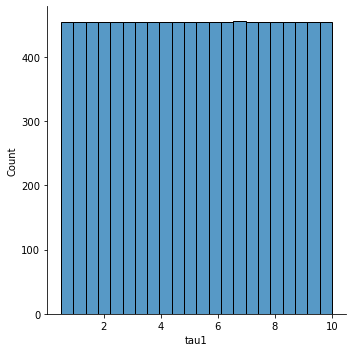

<Figure size 504x360 with 0 Axes>

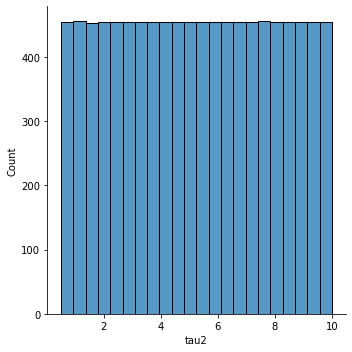

<Figure size 504x360 with 0 Axes>

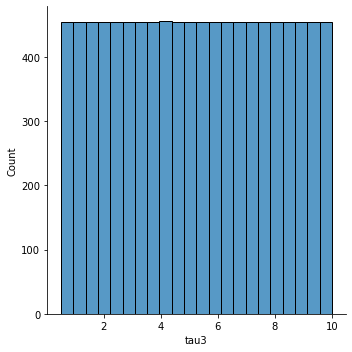

<Figure size 504x360 with 0 Axes>

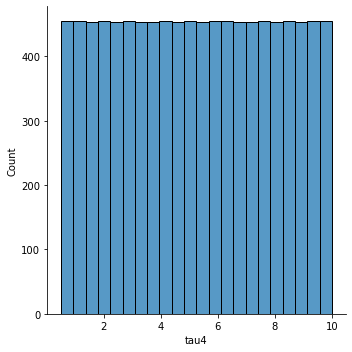

<Figure size 504x360 with 0 Axes>

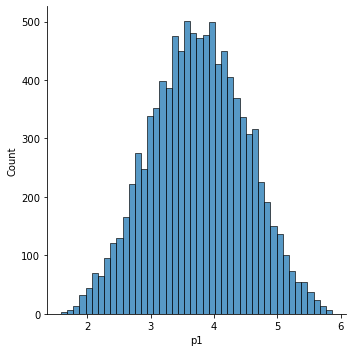

<Figure size 504x360 with 0 Axes>

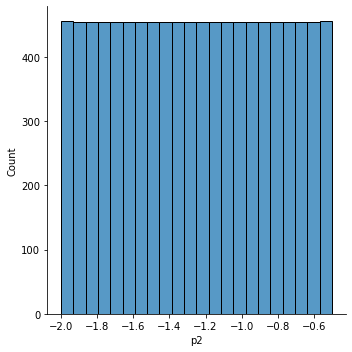

<Figure size 504x360 with 0 Axes>

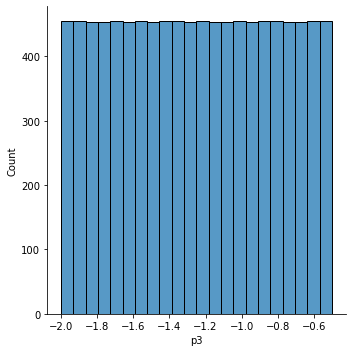

<Figure size 504x360 with 0 Axes>

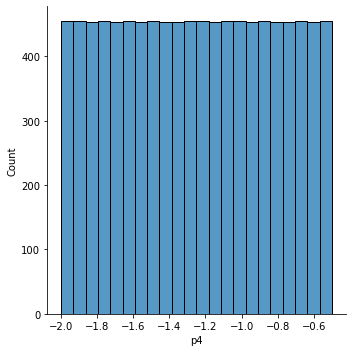

<Figure size 504x360 with 0 Axes>

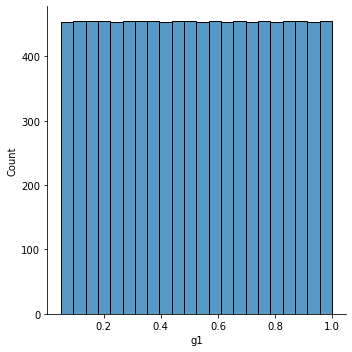

<Figure size 504x360 with 0 Axes>

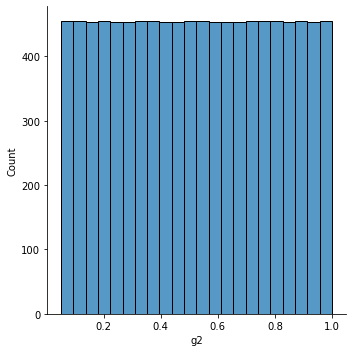

<Figure size 504x360 with 0 Axes>

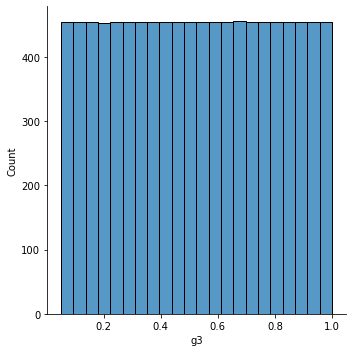

<Figure size 504x360 with 0 Axes>

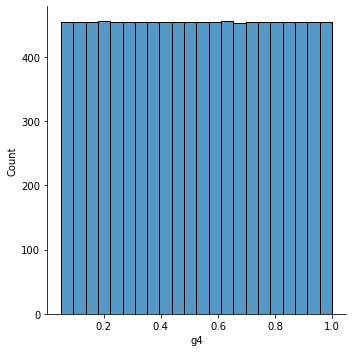

<Figure size 504x360 with 0 Axes>

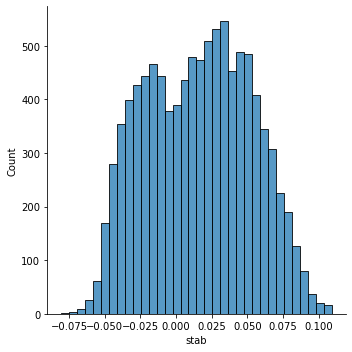

<Figure size 504x360 with 0 Axes>

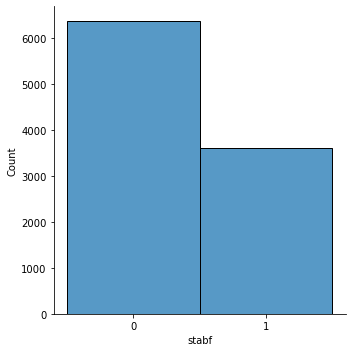

In [5]:
for col in df.columns:
    plt.figure(figsize=(7,5))
    sns.displot(df[col])

From above plot we can see clearly see most of the features has almost same number of observations for specific values

Plus, distribution of variables 'p1' and 'stab' is similar to normal distribution so lets find out there skewness 

In [6]:
df['p1'].skew()

-0.012690009637862652

In [7]:
df['stab'].skew()

0.01866344185145526

- **Ploting relationship of variable 'stab' with all other variables**

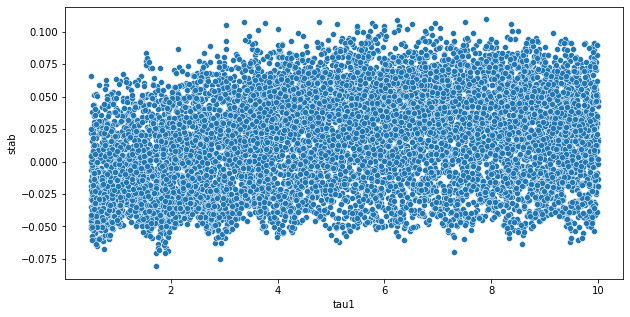

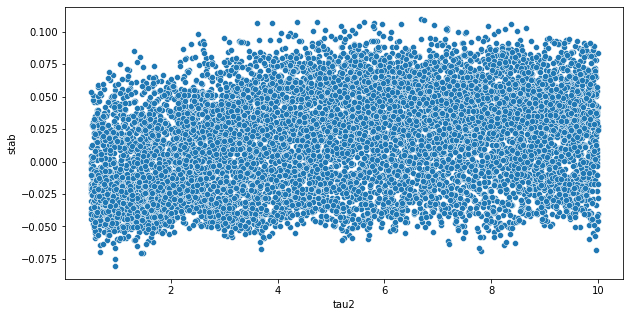

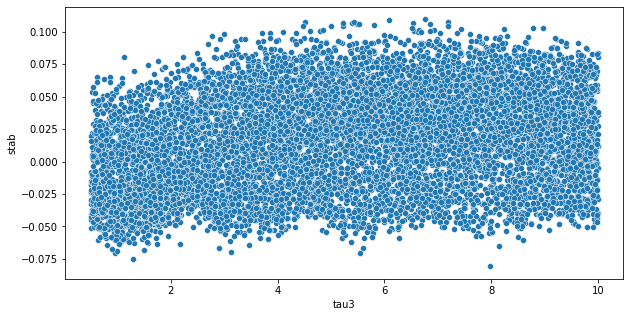

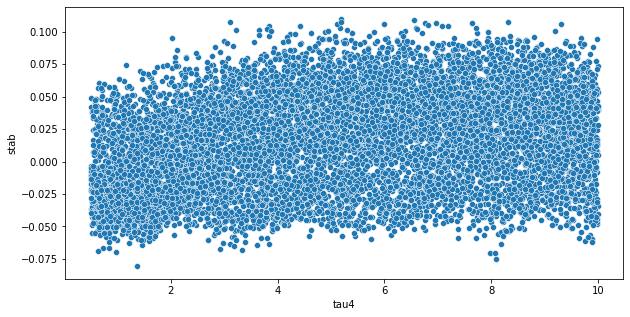

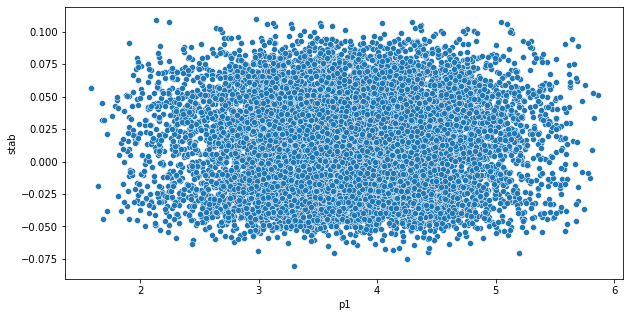

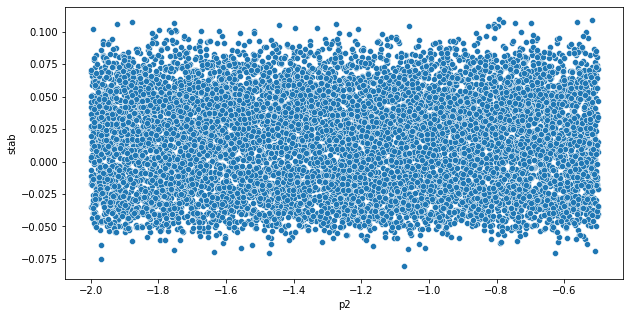

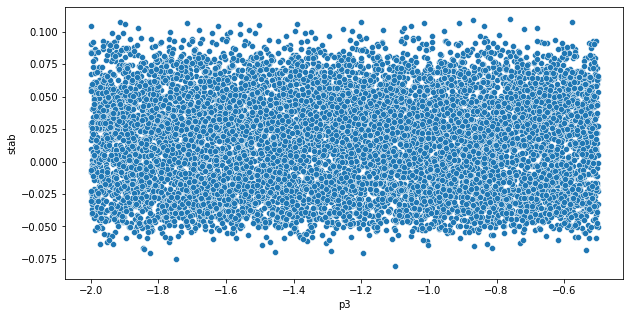

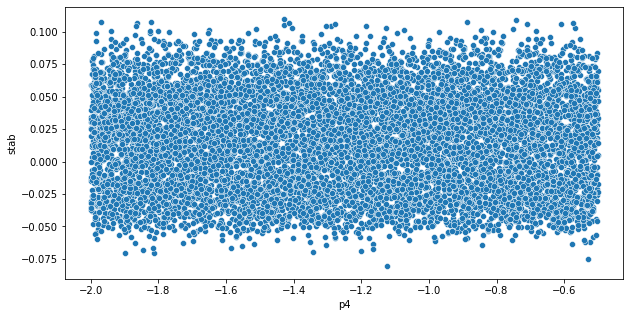

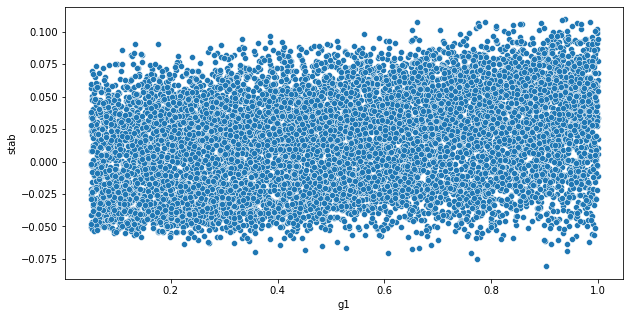

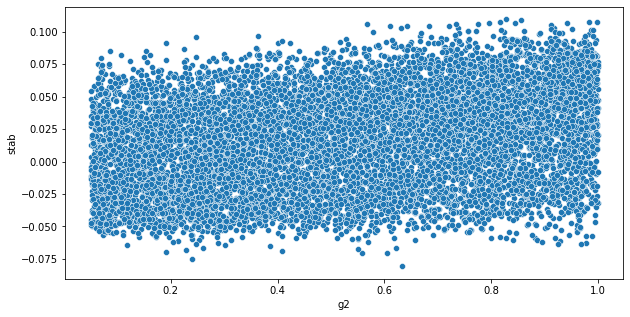

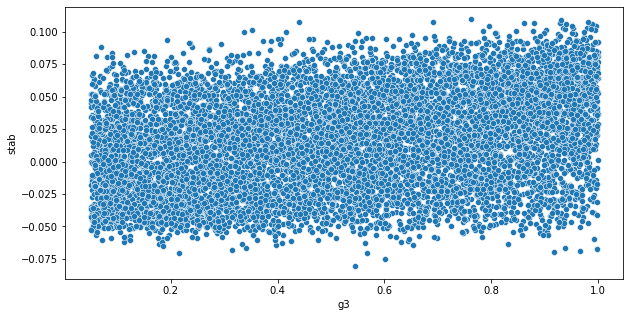

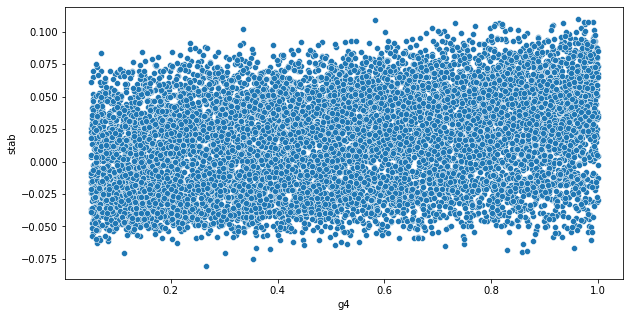

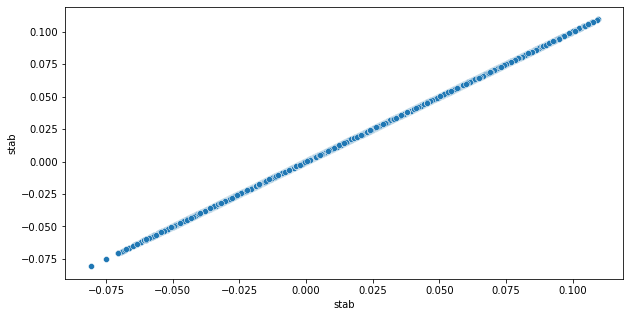

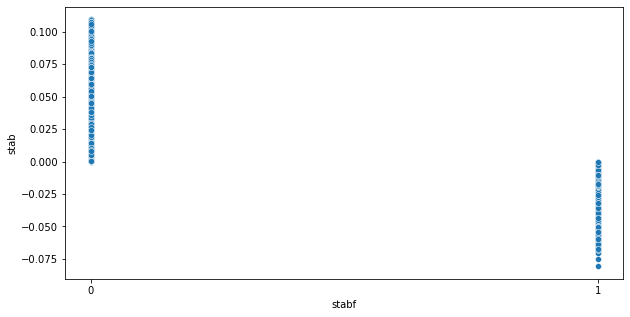

In [8]:
for col in df.columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df[col], y='stab', data= df)

The proportion of observations related to 'unstable' and 'stable' scenarios is mapped.



In [9]:
print("Split of unstable (0) and stable (1) observation in the orginal dataset:")
print(df['stabf'].value_counts(normalize=True))

Split of unstable (0) and stable (1) observation in the orginal dataset:
0    0.638
1    0.362
Name: stabf, dtype: float64


In [10]:
df['stabf'] = df['stabf'].astype('float64')

### 7.2 Correlation

Verifying correlation is important, as correlation helps us to understand relationship between variables. Plus, it indicates the change in one variable tends to change in the other variable. 

Lets find out correlation to all variables with respect to 'stabf'

<AxesSubplot:>

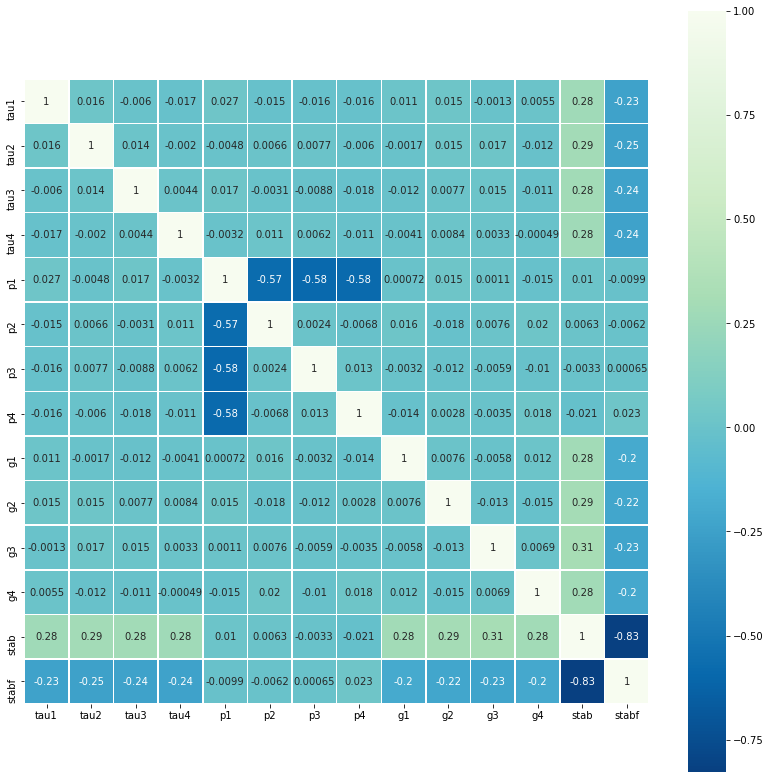

In [11]:
correlation = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation,cmap='GnBu_r',annot=True, square = True ,linewidths=.5)

From above heatmap, we can see, there is correlation between all the predictive features and dependent variable 'stabf'.

One may think from the above heatmap, correlation of some features are very minute to consider. To find if they are statistically significant to consider we can perform P-value test on Pearson correlation of those variables.

### 7.3 Segregating train and test set 

In [12]:
X = df.iloc[:, :12]  #assigning X features 
y = df.iloc[:, 13]  #assigning y features

In [13]:
X = X.values  # X dataframe to numpy array
y = y.values  # y dataframe to numpy array

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (8000, 12)
X_test shape (2000, 12)
y_train shape (8000,)
y_test shape (2000,)


We have partitioned our data into train and test sets where train set contains 8000 observations and test set contains 2000 observations. 

### 7.4 Scaling Features 

In preapare for model building scaling data is important to improve model performance.

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(8000,1).T
y_test = y_test.reshape(2000,1).T

In [17]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (12, 8000)
X_test shape (12, 2000)
y_train shape (1, 8000)
y_test shape (1, 2000)


## 8. Logistic Regression

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

In [18]:
# Defining sigmoid function 

def sigmoid(z):
    
    s = 1 / (1+np.exp(-z))
    
    return s 

In [19]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))  # Checking the above functions performance 

sigmoid([0, 2]) = [0.5        0.88079708]


In [20]:
# Initializing parameters 'w','b'

def initialize_with_zeros(dim):
    
    w = np.random.randn(dim, 1)*0.01
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [21]:
# Checking the above functions performance 

dim = 2                                              
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[-0.01283509]
 [ 0.00845853]]
b = 0


In [22]:
#Forward and Backward propagation

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    A = sigmoid(np.matmul(w.T, X) + b)
    cost = -1/m*np.sum(Y*np.log(A)+ (1-Y)*np.log(1-A))
    
    dw = (1/m)*(np.matmul(X, (A-Y).T))
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    

In [23]:
# Checking the above functions performance 

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [24]:
# Optimizing 'w' and 'b'

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [25]:
# Checking the above functions performance 

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [26]:
#Defing predict function

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.matmul(w.T, X)+ b)
    
    for i in range(A.shape[1]):
        
        
        if A[0,i]< 0.5:
            Y_prediction[0,i] = 0
        else: 
            Y_prediction[0,i] = 1
        
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [27]:
# Checking the above functions performance 

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [28]:
# Mergeing all functions into a model
r = -4*np.random.rand()
learning_rates = pow(10, r)
print(learning_rates)

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = learning_rates, print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])

    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [29]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.688830
Cost after iteration 100: 0.638245
Cost after iteration 200: 0.598862
Cost after iteration 300: 0.567859
Cost after iteration 400: 0.543114
Cost after iteration 500: 0.523075
Cost after iteration 600: 0.506621
Cost after iteration 700: 0.492936
Cost after iteration 800: 0.481421
Cost after iteration 900: 0.471630
Cost after iteration 1000: 0.463229
Cost after iteration 1100: 0.455959
Cost after iteration 1200: 0.449622
Cost after iteration 1300: 0.444062
Cost after iteration 1400: 0.439153
Cost after iteration 1500: 0.434796
Cost after iteration 1600: 0.430910
Cost after iteration 1700: 0.427429
Cost after iteration 1800: 0.424298
Cost after iteration 1900: 0.421471
train accuracy: 81.9625 %
test accuracy: 80.3 %


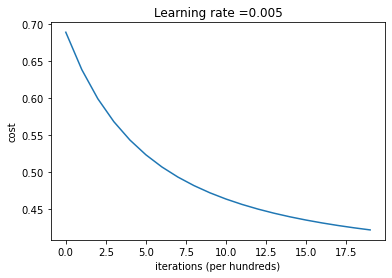

In [30]:
# Cost graph

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

Using logistic regression model we have achieved accuray of 80.4% for predicting stability of the grid.

Lets find out changinf in learning rate how it affects our model accuracy

In [33]:
learning_rates = [0.1,0.01, 0.001, 0.0001, 0.05]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

0.014658000646254821


Clearly learning rate of 0.001 performed best among others